In [143]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
from utils import loader
from utils import debugger 
from utils import preprocessing as pp 
from utils import misc
import implementations as impl
import cost
import model

In [145]:
error_value = -999.0
seed = 114

In [146]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)

nb_features = x.shape[1]

In [147]:
to_replace = [(error_value, 'most_frequent')]

tx = pp.preprocess(x, to_replace, do_normalise=True, add_bias=True)
nb_features = tx.shape[1]

train_data, test_data = misc.random_data_split(y, tx, k_fold=10)
tx, y = train_data

In [148]:
learning_param = {
    'max_iters' : 200,
    'gamma': 1e-7,
    'lambda_': 1e-6
}

    
w_initial = np.random.uniform(0,1,size=nb_features) 
model_lr = model.Model('logistic_regression', w_initial, learning_param, debug=True)

learning weights...
done.


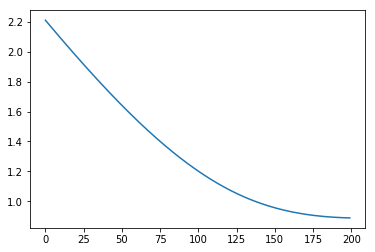

In [149]:
model_lr.learn_weights(y, tx)
model_lr.dbg.plot('loss')

In [162]:
w_initial = np.random.uniform(0,1,size=nb_features) 

learning_param = {
    'max_iters' : 200,
    'gamma': 1e-2
}


model_ls = model.Model('least_squares_GD', w_initial, learning_param, debug=True)

learning weights...
done.


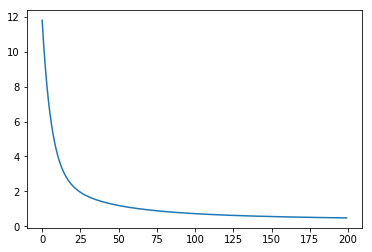

In [163]:
model_ls.learn_weights(y, tx)
model_ls.dbg.plot('loss')

In [152]:
w_initial = np.random.uniform(0,1,size=nb_features) 

learning_param = {
    'lambda_': 10e-5
}


model_ls = model.Model('ridge_regression', w_initial, learning_param, debug=True)

In [153]:
model_ls.learn_weights(y, tx)

learning weights...
done.


In [158]:
y_ = model_ls.predict(tx)
print('Train accuracy', misc.accuracy(y, y_))

Train accuracy 0.7456311111111111


In [155]:
x_te, y_te = test_data

In [159]:
y_ = model_ls.predict(x_te)
print('Test accuracy', misc.accuracy(y_te, y_))

Test accuracy 0.74728
